In [1]:
%matplotlib inline
from functions import *

In [2]:
data = pandas.read_csv('Daily_Demand_Forecasting_Orders.csv', delimiter=';')
data.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [3]:
X = data.iloc[:, :-3]
y = data.iloc[:, -3]
y = np.expand_dims(y,1)

X = np.array(X)
y = np.array(y)


In [4]:
from sklearn import preprocessing
X = preprocessing.scale(X)
y = preprocessing.scale(y)

# Plot non-linearity

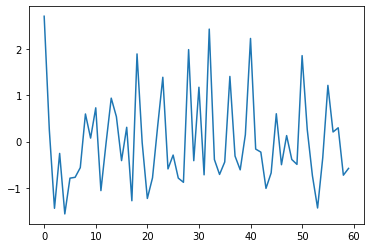

In [5]:
plt.plot(y)

# Closed Form (Pseudoinverse)

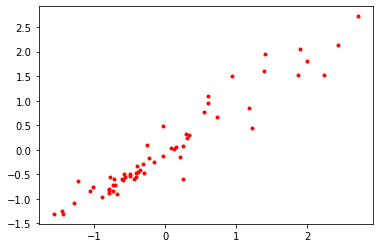

In [6]:
#Pseudo inverse only works for linear regression
#becuase the data is non-linear, directly applying pseudoinverse does not give good results 

w = closed_form(X,y)
pred_linear = X @ w

plt.plot(y,pred_linear,'.',Color='red')

# Radial Basis Function + Pseudoinverse

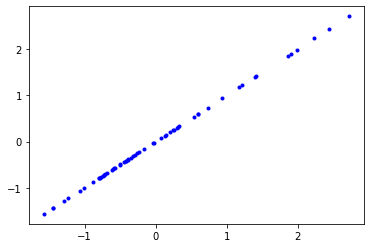

In [7]:
C = 60

U = RBF_design_matrix(X,C)
w_pseudoinv = RBF_pseudoinverse(X, y, C)
pred_RBF = U @ w_pseudoinv

plt.plot(y,pred_RBF,'.',Color='blue')

In [8]:
print(np.linalg.norm(y-pred_linear), np.linalg.norm(y-pred_RBF))

2.1864961679476425 4.1492511367629376e-15


# Radial Basis Function + SGD

In [13]:
C = [1,10,30,60]

results = []
for i in range(len(C)):
    w_RBF, losses = RBF_SGD(X, y, C[i], 0.1, 100)
    results.append([C[i], w_RBF, losses] )

Epoch: 0 Loss: 47.391411931313144
Epoch: 1 Loss: 47.389311566053514
Epoch: 2 Loss: 47.38723757379559
Epoch: 3 Loss: 47.38518962338968
Epoch: 4 Loss: 47.383167387844196
Epoch: 5 Loss: 47.38117054427337
Epoch: 6 Loss: 47.3791987738457
Epoch: 7 Loss: 47.37725176173307
Epoch: 8 Loss: 47.375329197060466
Epoch: 9 Loss: 47.37343077285634
Epoch: 10 Loss: 47.37155618600359
Epoch: 11 Loss: 47.36970513719118
Epoch: 12 Loss: 47.367877330866335
Epoch: 13 Loss: 47.36607247518736
Epoch: 14 Loss: 47.36429028197705
Epoch: 15 Loss: 47.362530466676624
Epoch: 16 Loss: 47.36079274830036
Epoch: 17 Loss: 47.35907684939072
Epoch: 18 Loss: 47.35738249597398
Epoch: 19 Loss: 47.3557094175166
Epoch: 20 Loss: 47.35405734688191
Epoch: 21 Loss: 47.35242602028752
Epoch: 22 Loss: 47.35081517726323
Epoch: 23 Loss: 47.349224560609365
Epoch: 24 Loss: 47.34765391635578
Epoch: 25 Loss: 47.34610299372125
Epoch: 26 Loss: 47.34457154507347
Epoch: 27 Loss: 47.34305932588952
Epoch: 28 Loss: 47.34156609471676
Epoch: 29 Loss: 47.

Epoch: 41 Loss: 18.63629305787787
Epoch: 42 Loss: 18.580730837762303
Epoch: 43 Loss: 18.52745475943023
Epoch: 44 Loss: 18.476278329454228
Epoch: 45 Loss: 18.427032998180923
Epoch: 46 Loss: 18.37956637960027
Epoch: 47 Loss: 18.333740649213595
Epoch: 48 Loss: 18.289431101998737
Epoch: 49 Loss: 18.246524854389424
Epoch: 50 Loss: 18.20693824548341
Epoch: 51 Loss: 18.172087154280003
Epoch: 52 Loss: 18.13810567446349
Epoch: 53 Loss: 18.10493016961121
Epoch: 54 Loss: 18.072503338571224
Epoch: 55 Loss: 18.04077357063964
Epoch: 56 Loss: 18.009726120165226
Epoch: 57 Loss: 17.979679533243694
Epoch: 58 Loss: 17.95016772841945
Epoch: 59 Loss: 17.92115989400566
Epoch: 60 Loss: 17.892628228991732
Epoch: 61 Loss: 17.86454763335846
Epoch: 62 Loss: 17.83689542988308
Epoch: 63 Loss: 17.809651114264025
Epoch: 64 Loss: 17.785392080596246
Epoch: 65 Loss: 17.765575340929413
Epoch: 66 Loss: 17.74596621414577
Epoch: 67 Loss: 17.72655421959063
Epoch: 68 Loss: 17.707330059391353
Epoch: 69 Loss: 17.68828548931714

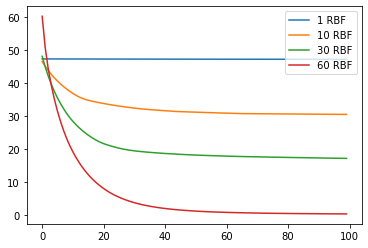

In [16]:
for i in range(len(results)):
    plt.plot(results[i][2],label=str(results[i][0])+' RBF')
    
plt.legend(loc="upper right")

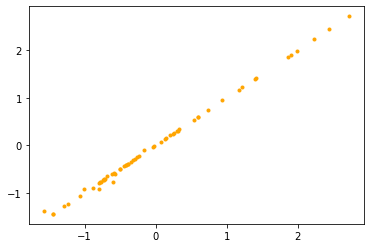

In [11]:
U = RBF_design_matrix(X,C)

predict = U @ w_RBF
plt.plot(y,predict,'.',Color='orange')

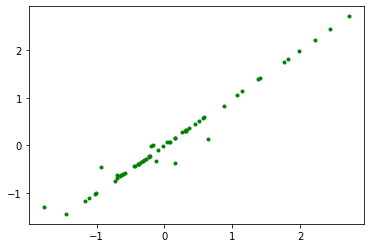

In [12]:
plt.plot(w_pseudoinv,w_RBF,'.',Color='green')

In [ ]:
C = 60
lr = 0.1

U = RBF_design_matrix(X,C)
w_RBF = np.random.randn(C,1)

epochs = 500
errors = []
for k in range(epochs):
    for i in range(len(U)):
        x = U[i]
        x = np.expand_dims(x,1)
        pred = x.T @ w_RBF

        error = y[i] - pred

        w_RBF = w_RBF - lr*(error*(-x))
        
    predict = U @ w_RBF
    error = np.sum(np.absolute(y - predict))
    errors.append(error)
    
    print('Epoch:',k, 'Loss:', error)

In [ ]:
plt.plot(w_pseudoinv,w_RBF,'.',Color='green')

In [ ]:
predict = U @ w_RBF
plt.plot(y,predict,'.',Color='orange')

In [ ]:
X

In [ ]:
y